# FLANDERS

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

# manage warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
FILEPATH = 'data/' 

In [95]:
df = pd.read_csv(FILEPATH + "all_results.csv", header=0)

In [96]:
print("Strategies: {}".format(df.strategy.unique()))
print("Attacks: {}".format(df.attack.unique()))
print("Datasets: {}".format(df.dataset_name.unique()))

Strategies: ['fltrust' 'mscred' 'krum' 'multikrum' 'bulyan' 'trimmedmean' 'flanders']
Attacks: ['fang' 'minmax' 'gaussian' 'no attack' 'lie']
Datasets: ['income']


In [97]:
len(df)

330

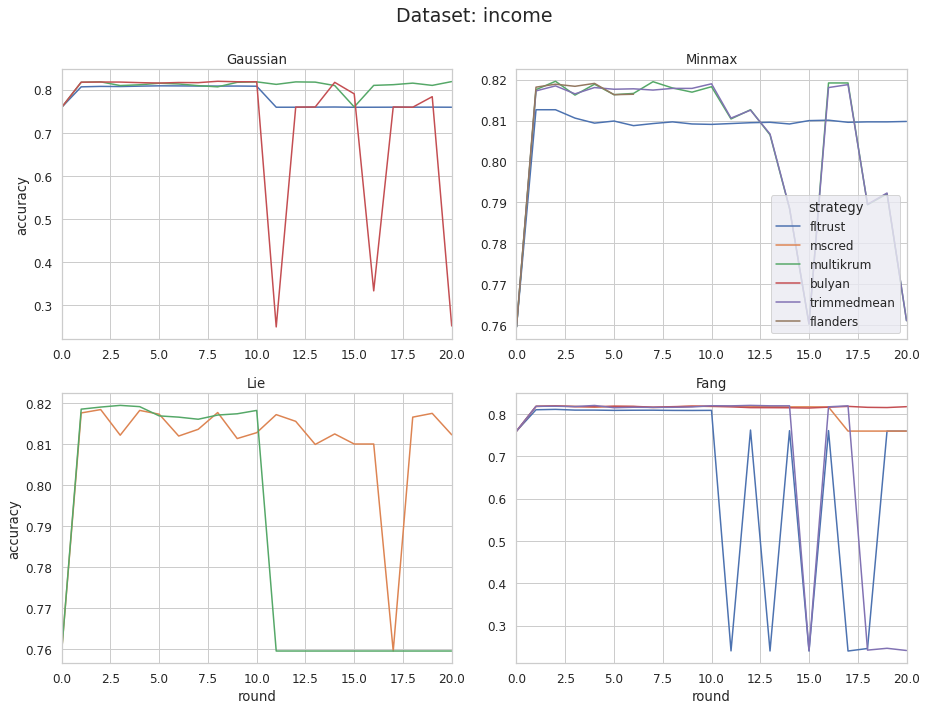

In [98]:
fig, axes = plt.subplots(2, 2)

dataset = df.dataset_name.unique()[0]
dfl = df.loc[df.dataset_name == dataset]

fig.set_figheight(10)
fig.set_figwidth(13)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")
fig.tight_layout(pad=2.0)
sns.set_style('whitegrid')

sns.set(font_scale=1.1)
ax1 = sns.lineplot(data=dfl.loc[dfl.attack == "gaussian"], y='accuracy', x='round', hue='strategy', ax=axes[0][0])
ax1.get_legend().remove()
ax1.set_xlabel('')
ax1.title.set_text('Gaussian')
ax1.set_xlim(0, 20)


ax2 = sns.lineplot(data=dfl.loc[dfl.attack == "minmax"], y='accuracy', x='round', hue='strategy', ax=axes[0][1])
#ax2.get_legend().remove()
ax2.title.set_text('Minmax')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlim(0, 20)

ax3 = sns.lineplot(data=dfl.loc[dfl.attack == "lie"], y='accuracy', x='round', hue='strategy', ax=axes[1][0])
ax3.get_legend().remove()
ax3.title.set_text('Lie')
ax3.set_xlim(0, 20)

ax4 = sns.lineplot(data=dfl.loc[dfl.attack == "fang"], y='accuracy', x='round', hue='strategy', ax=axes[1][1])
ax4.get_legend().remove()
ax4.title.set_text('Fang')
ax4.set_ylabel('')
ax4.set_xlim(0, 20)

sns.move_legend(ax2, "lower right")

plt.savefig("accuracy_lineplot_average_just_attacks.jpg", dpi=200)

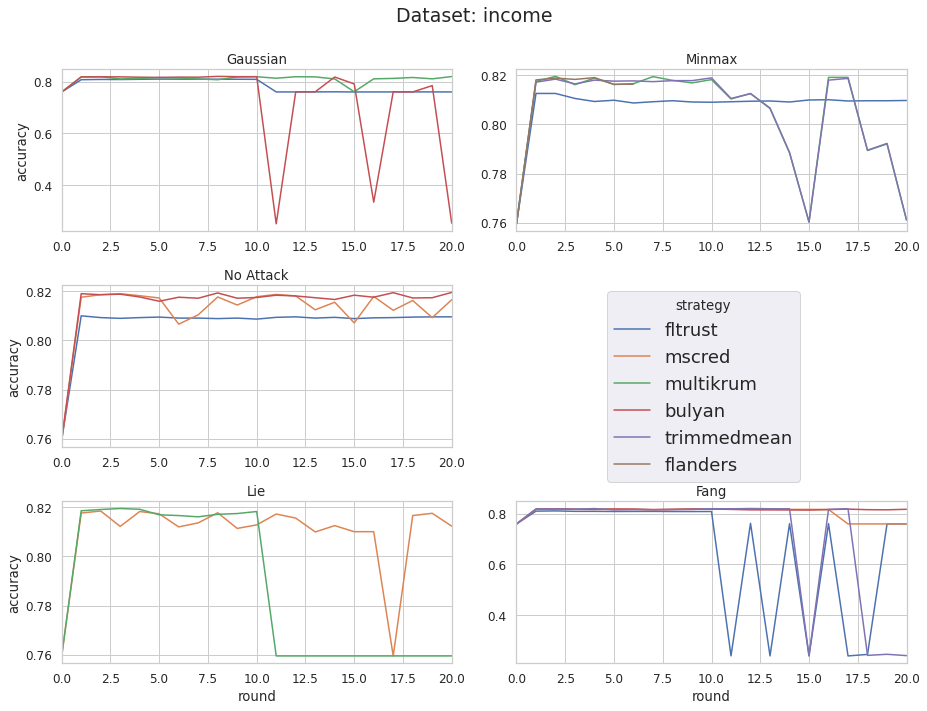

In [99]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(3, 2)
fig.delaxes(axes[1,1])

fig.set_figheight(10)
fig.set_figwidth(13)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")
fig.tight_layout(pad=2.0)

sns.set(font_scale=1.1)
ax1 = sns.lineplot(data=dfl.loc[dfl.attack == "gaussian"], y='accuracy', x='round', hue='strategy', ax=axes[0][0])
ax1.get_legend().remove()
ax1.set_xlabel('')
ax1.title.set_text('Gaussian')
ax1.set_xlim(0, 20)


ax2 = sns.lineplot(data=dfl.loc[dfl.attack == "minmax"], y='accuracy', x='round', hue='strategy', ax=axes[0][1])
#ax2.get_legend().remove()
ax2.title.set_text('Minmax')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xlim(0, 20)

ax5 = sns.lineplot(data=dfl.loc[dfl.attack == "no attack"], y='accuracy', x='round', hue='strategy', ax=axes[1][0])
ax5.get_legend().remove()
ax5.title.set_text('No Attack')
ax5.set_xlabel('')
ax5.set_xlim(0, 20)

ax3 = sns.lineplot(data=dfl.loc[dfl.attack == "lie"], y='accuracy', x='round', hue='strategy', ax=axes[2][0])
ax3.get_legend().remove()
ax3.title.set_text('Lie')
ax3.set_xlim(0, 20)

ax4 = sns.lineplot(data=dfl.loc[dfl.attack == "fang"], y='accuracy', x='round', hue='strategy', ax=axes[2][1])
ax4.get_legend().remove()
ax4.title.set_text('Fang')
ax4.set_ylabel('')
ax4.set_xlim(0, 20)

sns.move_legend(ax2, "lower right", bbox_to_anchor=(0.75,-1.6), prop={'size': 18})

plt.savefig("accuracy_lineplot_average.jpg", dpi=200)

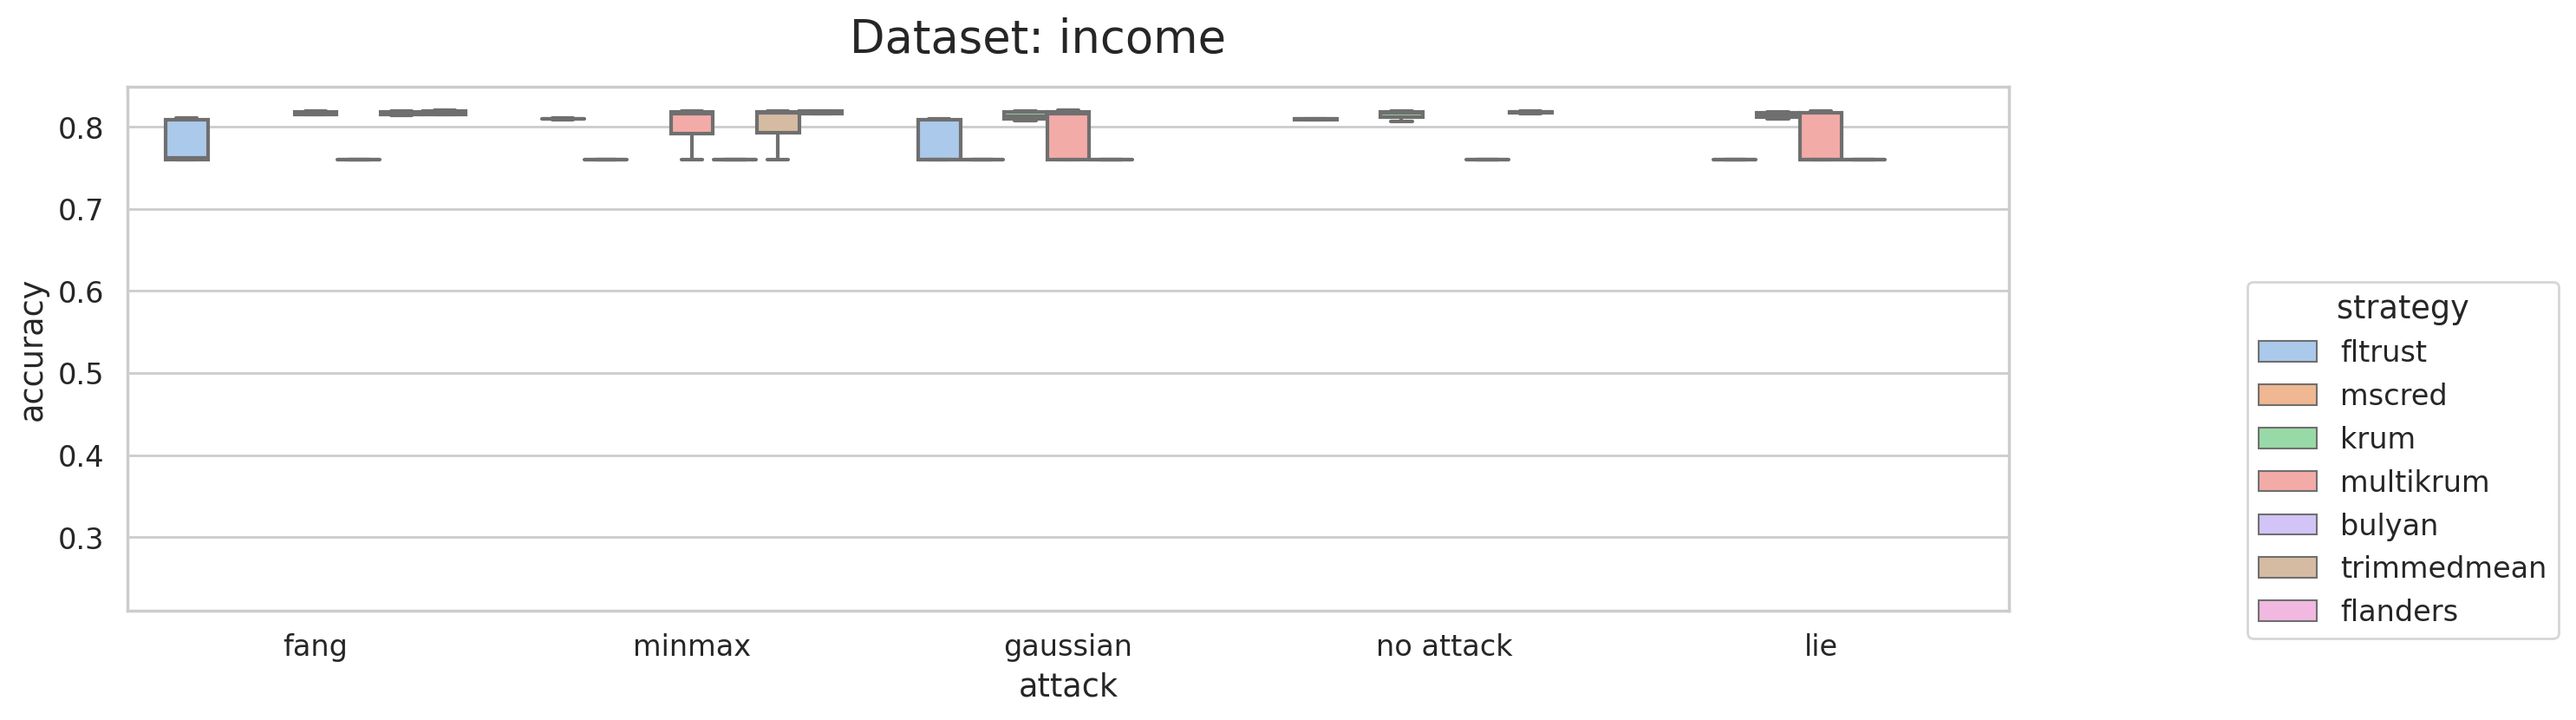

In [102]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.boxplot(data=dfl, x="attack", y="accuracy", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.3,0.655))
plt.savefig("accuracy_boxplot.jpg", bbox_inches='tight', dpi=300)

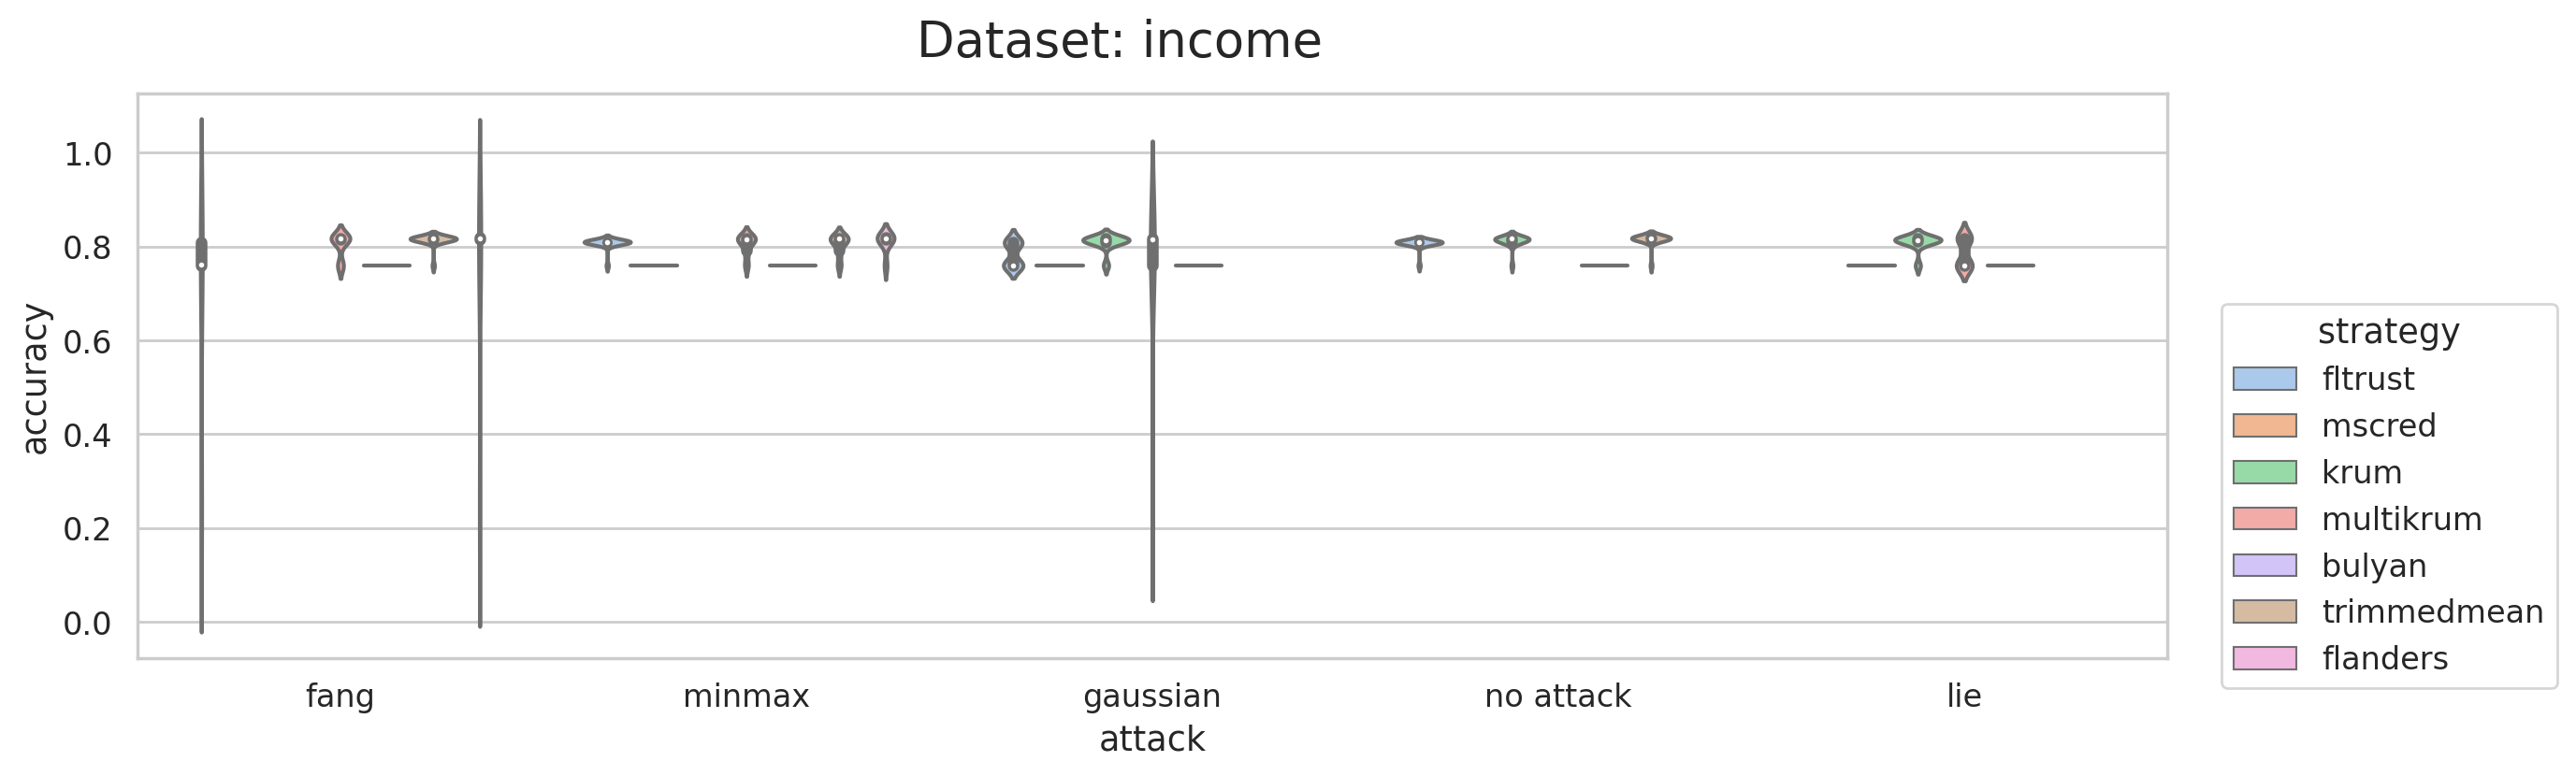

In [101]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 4), dpi=200)
plt.gcf().suptitle('Dataset: {}'.format(dataset), fontsize="x-large")


#sns.set(font_scale=1.)

ax = sns.violinplot(data=dfl, x="attack", y="accuracy", hue="strategy", fliersize=0, palette="pastel")
sns.move_legend(ax, "upper right", bbox_to_anchor=(1.2,0.655))
plt.savefig("accuracy_violinplot.jpg", bbox_inches='tight', dpi=300)